Formasi Terbaik:
GK: ['Muhammad Adi Satryo']
DEF: ['Asnawi Mangkualam', 'Justin Hubner', 'Sandy Walsh', 'Nathan Tjoe-A-On']
MID: ['Ricky Kambuaya', 'Marselino Ferdinan', 'Thom Haye']
FWD: ['Egy Maulana Vikri', 'Hokky Caraka', 'Witan Sulaeman']
Fitness: 0.9879


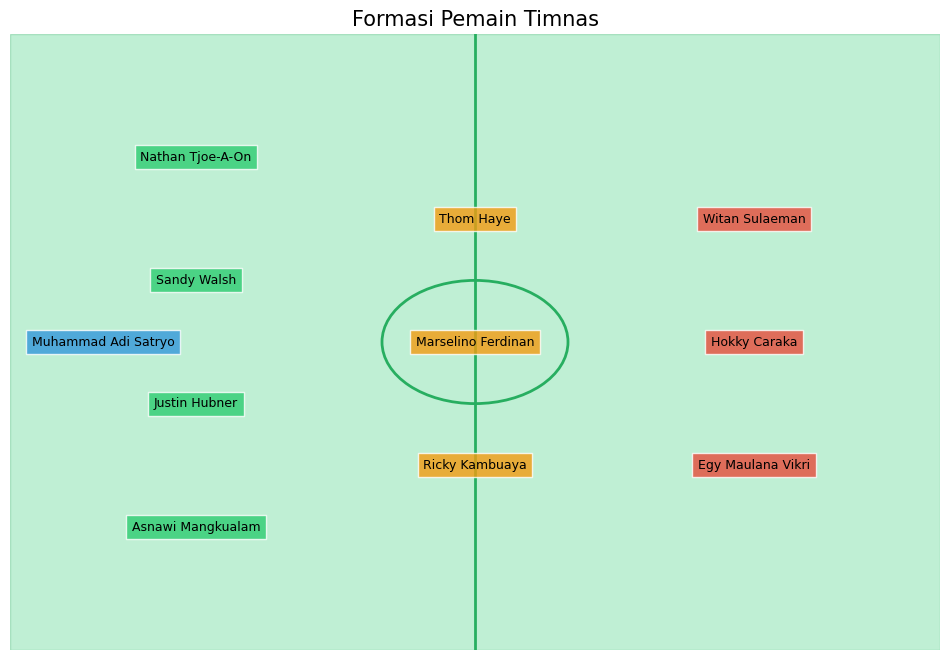

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle


# Kelas utama untuk mengoptimasi formasi pemain menggunakan algoritma Particle Swarm Optimization
class AdvancedTimnasPSO:
    def __init__(self, file_path):
        """
        Inisialisasi kelas dengan parameter berikut:
        - file_path: path ke file CSV yang berisi data pemain.
        
        Langkah awal:
        1. Membaca data pemain dari file CSV.
        2. Menambahkan atribut tambahan (kemampuan, stamina, mental) secara random.
        3. Mendefinisikan posisi ideal untuk formasi 4-3-3.
        4. Menentukan parameter algoritma PSO dan bobot fitness.
        """
        # Membaca data pemain
        self.df = pd.read_csv(file_path)
        
        # Menambahkan kolom tambahan untuk atribut pemain
        self.df['kemampuan'] = np.random.uniform(0, 10, len(self.df))  # Nilai kemampuan (0-10)
        self.df['stamina'] = np.random.uniform(0, 10, len(self.df))    # Nilai stamina (0-10)
        self.df['mental'] = np.random.uniform(0, 10, len(self.df))     # Nilai mental (0-10)
        
        # Posisi ideal untuk formasi 4-3-3 (dalam koordinat lapangan)
        self.posisi_ideal = {
            'GK': [(10, 50)],  # Penjaga gawang
            'DEF': [(20, 20), (20, 40), (20, 60), (20, 80)],  # Pemain bertahan
            'MID': [(50, 30), (50, 50), (50, 70)],  # Gelandang
            'FWD': [(80, 30), (80, 50), (80, 70)]  # Penyerang
        }
        
        # Parameter untuk algoritma PSO
        self.max_iter = 200  # Jumlah iterasi maksimum
        self.num_particles = 100  # Jumlah partikel dalam populasi
        self.w = 0.7  # Faktor inersia (untuk mengontrol kecepatan perubahan)
        self.c1 = 1.5  # Faktor kognitif (pengaruh pengalaman individu)
        self.c2 = 1.5  # Faktor sosial (pengaruh populasi secara global)
        
        # Bobot untuk komponen fitness
        self.weights = {
            'posisi': 0.4,  # Bobot kesesuaian posisi
            'kemampuan': 0.3,  # Bobot kemampuan pemain
            'kompatibilitas': 0.3  # Bobot kompatibilitas tim
        }

    def hitung_fitness_extended(self, formasi):
        """
        Menghitung nilai fitness untuk formasi tertentu.
        Komponen fitness mencakup:
        1. Kesesuaian posisi pemain.
        2. Kemampuan rata-rata pemain.
        3. Kompatibilitas antar pemain di setiap lini.
        """
        total_fitness = (
            self.weights['posisi'] * self._evaluasi_kesesuaian_posisi(formasi) +
            self.weights['kemampuan'] * self._evaluasi_kemampuan_pemain(formasi) +
            self.weights['kompatibilitas'] * self._evaluasi_kompatibilitas_tim(formasi)
        )
        return total_fitness

    def _evaluasi_kesesuaian_posisi(self, formasi):
        """
        Mengevaluasi apakah pemain ditempatkan sesuai posisi ideal mereka.
        Memberikan skor lebih tinggi jika posisi pemain sesuai dengan spesialisasinya.
        """
        skor_posisi = 0
        for posisi, pemain_list in formasi.items():
            for pemain in pemain_list:
                posisi_asli = self.df[self.df['nama'] == pemain]['posisi'].values[0]
                if posisi_asli == posisi:  # Periksa apakah posisi pemain sesuai
                    skor_posisi += 1
        return skor_posisi / len(self.df)  # Normalisasi skor

    def _evaluasi_kemampuan_pemain(self, formasi):
        """
        Mengevaluasi kemampuan rata-rata pemain dalam formasi.
        Rata-rata diambil dari atribut 'kemampuan', 'stamina', dan 'mental'.
        """
        total_kemampuan = 0
        for pemain_list in formasi.values():
            for pemain in pemain_list:
                kemampuan = self.df[self.df['nama'] == pemain][['kemampuan', 'stamina', 'mental']].mean().mean()
                total_kemampuan += kemampuan
        return total_kemampuan / len(self.df)  # Normalisasi rata-rata

    def _evaluasi_kompatibilitas_tim(self, formasi):
        """
        Mengevaluasi kompatibilitas antar pemain di tiap lini (berdasarkan distribusi kemampuan).
        Semakin kecil standar deviasi kemampuan, semakin baik kompatibilitasnya.
        """
        kompatibilitas = 0
        for posisi, pemain_list in formasi.items():
            kemampuan_lini = [self.df[self.df['nama'] == pemain]['kemampuan'].values[0] for pemain in pemain_list]
            kompatibilitas += np.std(kemampuan_lini)  # Menghitung variasi kemampuan
        return 1 / (1 + kompatibilitas)  # Skor kompatibilitas (lebih kecil variasi, lebih besar skor)

    def pso_optimasi(self):
        """
        Implementasi algoritma PSO untuk menemukan formasi pemain terbaik.
        1. Membuat populasi awal dengan formasi random.
        2. Menghitung fitness untuk tiap partikel (formasi).
        3. Melakukan iterasi untuk memperbarui posisi dan mencari solusi terbaik.
        """
        # Mengelompokkan pemain berdasarkan posisi
        pemain_by_posisi = {posisi: self.df[self.df['posisi'] == posisi]['nama'].tolist() for posisi in ['GK', 'DEF', 'MID', 'FWD']}
        
        # Inisialisasi populasi awal
        populasi = []
        fitness_populasi = []
        
        for _ in range(self.num_particles):
            # Membuat formasi random
            formasi = {
                'GK': random.sample(pemain_by_posisi['GK'], 1),
                'DEF': random.sample(pemain_by_posisi['DEF'], 4),
                'MID': random.sample(pemain_by_posisi['MID'], 3),
                'FWD': random.sample(pemain_by_posisi['FWD'], 3)
            }
            populasi.append(formasi)
            fitness_populasi.append(self.hitung_fitness_extended(formasi))
        
        # Inisialisasi solusi terbaik
        best_formasi = populasi[np.argmax(fitness_populasi)]
        best_fitness = max(fitness_populasi)
        
        # Iterasi optimasi
        for _ in range(self.max_iter):
            for i in range(len(populasi)):
                # Membuat variasi formasi baru
                formasi_baru = {
                    'GK': random.sample(pemain_by_posisi['GK'], 1),
                    'DEF': random.sample(pemain_by_posisi['DEF'], 4),
                    'MID': random.sample(pemain_by_posisi['MID'], 3),
                    'FWD': random.sample(pemain_by_posisi['FWD'], 3)
                }
                fitness_baru = self.hitung_fitness_extended(formasi_baru)
                # Update solusi terbaik jika diperlukan
                if fitness_baru > best_fitness:
                    best_formasi = formasi_baru
                    best_fitness = fitness_baru
        
        return best_formasi, best_fitness

    def plot_tim(self, formasi):
        """
        Membuat visualisasi formasi pemain di lapangan menggunakan matplotlib.
        """
        plt.figure(figsize=(12, 8))
        ax = plt.gca()
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        
        # Menggambar lapangan
        ax.add_patch(Rectangle((0, 0), 100, 100, facecolor='#2ECC71', edgecolor='#27AE60', alpha=0.3))
        
        # Menampilkan pemain di posisi masing-masing
        colors = {'GK': '#3498DB', 'DEF': '#2ECC71', 'MID': '#F39C12', 'FWD': '#E74C3C'}
        for posisi, pemain_list in formasi.items():
            for (x, y), pemain in zip(self.posisi_ideal[posisi], pemain_list):
                ax.text(x, y, pemain, fontsize=9, ha='center', va='center',
                        bbox=dict(facecolor=colors[posisi], edgecolor='white', alpha=0.8))
        
        # Menambahkan garis tengah dan lingkaran
        plt.plot([50, 50], [0, 100], color='#27AE60', linewidth=2)
        circle = Circle((50, 50), 10, edgecolor='#27AE60', facecolor='none', linewidth=2)
        ax.add_patch(circle)
        
        plt.title('Formasi Pemain Timnas', fontsize=15)
        plt.axis('off')
        plt.show()

    def jalankan_optimasi(self):
        """
        Menjalankan optimasi PSO dan menampilkan hasil formasi terbaik serta fitness-nya.
        """
        best_formasi, best_fitness = self.pso_optimasi()
        print("Formasi Terbaik:")
        for posisi, pemain in best_formasi.items():
            print(f"{posisi}: {pemain}")
        print(f"Fitness: {best_fitness:.4f}")
        self.plot_tim(best_formasi)
        return best_formasi


# Contoh Penggunaan
if __name__ == "__main__":
    tim_optimizer = AdvancedTimnasPSO('Daftar_Pemain_Timnas_Indonesia_2026.csv')
    tim_optimizer.jalankan_optimasi()
